In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.iolib.smpickle import load_pickle
import zipfile
import io

In [15]:
archive = zipfile.ZipFile("cps_data/epi_cpsbasic_2000_2022.zip", 'r')
dta_file = archive.open('epi_cpsbasic_2021.dta')

In [17]:
cps_2021 = pd.read_stata(dta_file)

In [19]:
cps_2021.shape

(1280078, 124)

In [37]:
cps_2021["agechild"].value_counts()

No own children under 18 years of age                         882993
All own children 6-13 years of age                             49262
All own children 14-17 years of age                            32113
Own children 6-13 and 14-17 years of age (none 0-5)            24755
All own children 0-2 years of age                              19232
Own children 3-5 and 6-13 years of age (none 0-2 or 14-17)     18157
All own children 3-5 years of age                              13956
Own children 0-2 and 3-5 years of age (none 6-17)               9732
Own children 0-2 and 6-13 years of age (none 3-5 or 14-17)      7847
Own children 0-2, 3-5, and  6-13 years of age (none 14-17)      5556
Own children 3-5, 6-13, and 14-17 years of age (none 0-2)       3319
Own children 0-2, 6-13, and 14-17 years of age (none 3-5)       1796
Own children 3-5 and 14-17 years of age (none 0-2 or 6-13)      1451
Own children 0-2 and 14-17 years of age (none 3-13)             1087
Own children from all age groups  

In [23]:
cps_2021["Eligible"] = (cps_2021["agechild"] != "No own children under 18 years of age")

In [26]:
cps_2021 = cps_2021[cps_2021["faminc"] != "$150,000+ (2003m10-present)"]

In [28]:
cps_2021["Post"] = (cps_2021["month"] > 6) & (cps_2021["month"] < 12)

In [30]:
cps_2021['hourslwt']

0           NaN
1          36.0
2           NaN
3           NaN
4          40.0
           ... 
1280073     NaN
1280074    32.0
1280075     NaN
1280076     NaN
1280077    45.0
Name: hourslwt, Length: 1072364, dtype: float64

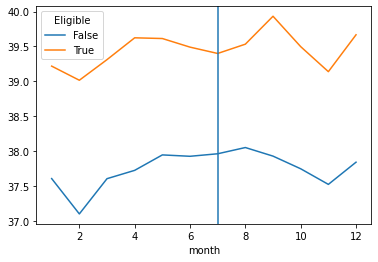

In [36]:
cps_2021.pivot_table(columns="Eligible", index="month", values="hourslwt").plot()
plt.axvline(7)
        # pivoted_data = df_m.pivot_table(columns="Eligible", index="Week", values=dependent_vars[counter])
